# 10 minutes to Koalas

This is a short introduction to Koalas, geared mainly for new users. This notebook was borrowed from [Koalas documentation page](https://koalas.readthedocs.io/en/latest/) and shows you some key differences between pandas and Koalas. You can run this examples by yourself on a live notebook [here](https://mybinder.org/v2/gh/databricks/koalas/master?filepath=docs%2Fsource%2Fgetting_started%2F10min.ipynb) or in a Spark cluster.

In [52]:
# Install required packages
#pip install koalas

In [53]:
import pandas as pd
import numpy as np
import sys
import databricks.koalas as ks
from pyspark.sql import SparkSession

print("Python version:", sys.version)
print("Spark version:", SparkSession.builder.getOrCreate().version)
print("Koalas version:", ks.__version__)

Python version: 3.7.4 (default, Aug 13 2019, 20:35:49) 
[GCC 7.3.0]
Spark version: 3.0.0
Koalas version: 1.2.0


## Object Creation



Creating a Koalas Series by passing a list of values, letting Koalas create a default integer index:

In [54]:
s = ks.Series([1, 3, 5, np.nan, 6, 8])

In [55]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a Koalas DataFrame by passing a dict of objects that can be converted to series-like.

In [56]:
kdf = ks.DataFrame(
    {'a': [1, 2, 3, 4, 5, 6],
     'b': [100, 200, 300, 400, 500, 600],
     'c': ["one", "two", "three", "four", "five", "six"]},
    index=[10, 20, 30, 40, 50, 60])

In [57]:
kdf

,a,b,c
10,1,100,one
20,2,200,two
30,3,300,three
40,4,400,four
50,5,500,five
60,6,600,six


Creating a pandas DataFrame by passing a numpy array, with a datetime index and labeled columns:

In [58]:
dates = pd.date_range('20130101', periods=6)

In [59]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [60]:
pdf = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))

In [61]:
pdf

,A,B,C,D
2013-01-01,1.107694,-1.292643,0.289159,-0.888153
2013-01-02,-0.491601,1.429422,1.273581,-0.015137
2013-01-03,0.231584,-0.697526,1.129915,2.232127
2013-01-04,-0.386590,-0.222338,0.768321,-0.516040
2013-01-05,-0.197337,1.368484,-0.547418,0.076357
2013-01-06,1.261414,3.406629,-1.784244,-0.685311


Now, this pandas DataFrame can be converted to a Koalas DataFrame

In [62]:
kdf = ks.from_pandas(pdf)

In [63]:
type(kdf)

databricks.koalas.frame.DataFrame

It looks and behaves the same as a pandas DataFrame though

In [64]:
kdf

,A,B,C,D
2013-01-01,1.107694,-1.292643,0.289159,-0.888153
2013-01-02,-0.491601,1.429422,1.273581,-0.015137
2013-01-03,0.231584,-0.697526,1.129915,2.232127
2013-01-04,-0.386590,-0.222338,0.768321,-0.516040
2013-01-05,-0.197337,1.368484,-0.547418,0.076357
2013-01-06,1.261414,3.406629,-1.784244,-0.685311


Also, it is possible to create a Koalas DataFrame from Spark DataFrame.  

Creating a Spark DataFrame from pandas DataFrame

In [65]:
spark = SparkSession.builder.getOrCreate()

In [66]:
sdf = spark.createDataFrame(pdf)

In [67]:
sdf.show()

+--------------------+--------------------+-------------------+--------------------+
|                   A|                   B|                  C|                   D|
+--------------------+--------------------+-------------------+--------------------+
|  1.1076940331134844|  -1.292642755381875|0.28915880255484466| -0.8881527610343394|
|-0.49160141880900704|  1.4294220995064144| 1.2735807550727671|-0.01513710991550...|
| 0.23158350993027987| -0.6975255678270281|  1.129915461987339|  2.2321272599301745|
|-0.38659038068417684|-0.22233790659167454| 0.7683211782626663|  -0.516039999364516|
| -0.1973372698297093|  1.3684840987296996| -0.547417902460165| 0.07635743198537129|
|  1.2614135847162684|   3.406628746240103|-1.7842437253121972| -0.6853114917064688|
+--------------------+--------------------+-------------------+--------------------+



Creating Koalas DataFrame from Spark DataFrame.
`to_koalas()` is automatically attached to Spark DataFrame and available as an API when Koalas is imported.

In [68]:
kdf = sdf.to_koalas()

In [69]:
kdf

,A,B,C,D
0,1.107694,-1.292643,0.289159,-0.888153
1,-0.491601,1.429422,1.273581,-0.015137
2,0.231584,-0.697526,1.129915,2.232127
3,-0.386590,-0.222338,0.768321,-0.516040
4,-0.197337,1.368484,-0.547418,0.076357
5,1.261414,3.406629,-1.784244,-0.685311


Having specific [dtypes](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-dtypes) . Types that are common to both Spark and pandas are currently supported.

In [70]:
kdf.dtypes

A    float64
B    float64
C    float64
D    float64
dtype: object

## Viewing Data

See the [API Reference](https://koalas.readthedocs.io/en/latest/reference/index.html).

See the top rows of the frame. The results may not be the same as pandas though: unlike pandas, the data in a Spark dataframe is not _ordered_, it has no intrinsic notion of index. When asked for the head of a dataframe, Spark will just take the requested number of rows from a partition. Do not rely on it to return specific rows, use `.loc` or `iloc` instead.

In [71]:
kdf.head()

,A,B,C,D
0,1.107694,-1.292643,0.289159,-0.888153
1,-0.491601,1.429422,1.273581,-0.015137
2,0.231584,-0.697526,1.129915,2.232127
3,-0.386590,-0.222338,0.768321,-0.516040
4,-0.197337,1.368484,-0.547418,0.076357


Display the index, columns, and the underlying numpy data.

You can also retrieve the index; the index column can be ascribed to a DataFrame, see later

In [72]:
kdf.index

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')

In [73]:
kdf.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [74]:
kdf.to_numpy()

array([[ 1.10769403, -1.29264276,  0.2891588 , -0.88815276],
       [-0.49160142,  1.4294221 ,  1.27358076, -0.01513711],
       [ 0.23158351, -0.69752557,  1.12991546,  2.23212726],
       [-0.38659038, -0.22233791,  0.76832118, -0.51604   ],
       [-0.19733727,  1.3684841 , -0.5474179 ,  0.07635743],
       [ 1.26141358,  3.40662875, -1.78424373, -0.68531149]])

Describe shows a quick statistic summary of your data

In [75]:
kdf.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.254194,0.665338,0.188219,0.033974
std,0.763434,1.736201,1.169896,1.140727
min,-0.491601,-1.292643,-1.784244,-0.888153
25%,-0.386590,-0.697526,-0.547418,-0.685311
50%,-0.197337,-0.222338,0.289159,-0.516040
75%,1.107694,1.429422,1.129915,0.076357
max,1.261414,3.406629,1.273581,2.232127


Transposing your data

In [76]:
kdf.T

,0,1,2,3,4,5
A,1.107694,-0.491601,0.231584,-0.386590,-0.197337,1.261414
B,-1.292643,1.429422,-0.697526,-0.222338,1.368484,3.406629
C,0.289159,1.273581,1.129915,0.768321,-0.547418,-1.784244
D,-0.888153,-0.015137,2.232127,-0.516040,0.076357,-0.685311


Sorting by its index

In [77]:
kdf.sort_index(ascending=False)

,A,B,C,D
5,1.261414,3.406629,-1.784244,-0.685311
4,-0.197337,1.368484,-0.547418,0.076357
3,-0.386590,-0.222338,0.768321,-0.516040
2,0.231584,-0.697526,1.129915,2.232127
1,-0.491601,1.429422,1.273581,-0.015137
0,1.107694,-1.292643,0.289159,-0.888153


Sorting by value

In [78]:
kdf.sort_values(by='B')

,A,B,C,D
0,1.107694,-1.292643,0.289159,-0.888153
2,0.231584,-0.697526,1.129915,2.232127
3,-0.386590,-0.222338,0.768321,-0.516040
4,-0.197337,1.368484,-0.547418,0.076357
1,-0.491601,1.429422,1.273581,-0.015137
5,1.261414,3.406629,-1.784244,-0.685311


## Missing Data
Koalas primarily uses the value `np.nan` to represent missing data. It is by default not included in computations. 


In [79]:
pdf1 = pdf.reindex(index=dates[0:4], columns=list(pdf.columns) + ['E'])

In [80]:
pdf1.loc[dates[0]:dates[1], 'E'] = 1

In [81]:
kdf1 = ks.from_pandas(pdf1)

In [82]:
kdf1

,A,B,C,D,E
2013-01-01,1.107694,-1.292643,0.289159,-0.888153,1.0
2013-01-02,-0.491601,1.429422,1.273581,-0.015137,1.0
2013-01-03,0.231584,-0.697526,1.129915,2.232127,NaN
2013-01-04,-0.386590,-0.222338,0.768321,-0.516040,NaN


To drop any rows that have missing data.

In [83]:
kdf1.dropna(how='any')

,A,B,C,D,E
2013-01-01,1.107694,-1.292643,0.289159,-0.888153,1.0
2013-01-02,-0.491601,1.429422,1.273581,-0.015137,1.0


Filling missing data.

In [84]:
kdf1.fillna(value=5)

,A,B,C,D,E
2013-01-01,1.107694,-1.292643,0.289159,-0.888153,1.0
2013-01-02,-0.491601,1.429422,1.273581,-0.015137,1.0
2013-01-03,0.231584,-0.697526,1.129915,2.232127,5.0
2013-01-04,-0.386590,-0.222338,0.768321,-0.516040,5.0


## Operations

### Stats
Operations in general exclude missing data.

Performing a descriptive statistic:

In [85]:
kdf.mean()

A    0.254194
B    0.665338
C    0.188219
D    0.033974
dtype: float64

### Spark Configurations

Various configurations in PySpark could be applied internally in Koalas.
For example, you can enable Arrow optimization to hugely speed up internal pandas conversion. See <a href="https://spark.apache.org/docs/latest/sql-pyspark-pandas-with-arrow.html">PySpark Usage Guide for Pandas with Apache Arrow</a>.

In [86]:
prev = spark.conf.get("spark.sql.execution.arrow.enabled")  # Keep its default value.
ks.set_option("compute.default_index_type", "distributed")  # Use default index prevent overhead.
import warnings
warnings.filterwarnings("ignore")  # Ignore warnings coming from Arrow optimizations.

In [87]:
spark.conf.set("spark.sql.execution.arrow.enabled", True)
%timeit ks.range(300000).to_pandas()

154 ms ± 9.18 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [88]:
spark.conf.set("spark.sql.execution.arrow.enabled", False)
%timeit ks.range(300000).to_pandas()

1.17 s ± 48 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [89]:
ks.reset_option("compute.default_index_type")
spark.conf.set("spark.sql.execution.arrow.enabled", prev)  # Set its default value back.

## Grouping
By “group by” we are referring to a process involving one or more of the following steps:

- Splitting the data into groups based on some criteria
- Applying a function to each group independently
- Combining the results into a data structure

In [90]:
kdf = ks.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B': ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                    'C': np.random.randn(8),
                    'D': np.random.randn(8)})

In [91]:
kdf

,A,B,C,D
0,foo,one,-1.464176,0.363656
1,bar,one,0.259823,-0.198332
2,foo,two,0.524628,0.417641
3,bar,three,2.134112,-0.786513
4,foo,two,-2.367878,2.472903
5,bar,two,0.979630,-1.248222
6,foo,one,-0.395410,0.673706
7,foo,three,0.347490,-0.064529


Grouping and then applying the [sum()](https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.groupby.GroupBy.sum.html#databricks.koalas.groupby.GroupBy.sum) function to the resulting groups.

In [92]:
kdf.groupby('A').sum()

,C,D
A,,
bar,3.373565,-2.233067
foo,-3.355346,3.863376


Grouping by multiple columns forms a hierarchical index, and again we can apply the sum function.

In [93]:
kdf.groupby(['A', 'B']).sum()

C         D
A   B                        
foo one   -1.859586  1.037361
    two   -1.843250  2.890544
bar three  2.134112 -0.786513
foo three  0.347490 -0.064529
bar two    0.979630 -1.248222
    one    0.259823 -0.198332

## Plotting
See the <a href="https://koalas.readthedocs.io/en/latest/reference/frame.html#plotting">Plotting</a> docs.

In [94]:
%matplotlib inline
from matplotlib import pyplot as plt

In [95]:
pser = pd.Series(np.random.randn(1000),
                 index=pd.date_range('1/1/2000', periods=1000))

In [96]:
kser = ks.Series(pser)

In [97]:
kser = kser.cummax()

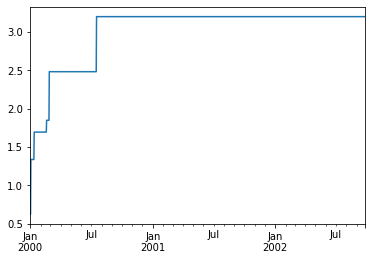

In [98]:
kser.plot()

On a DataFrame, the <a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.frame.DataFrame.plot.html#databricks.koalas.frame.DataFrame.plot">plot()</a> method is a convenience to plot all of the columns with labels:

In [99]:
pdf = pd.DataFrame(np.random.randn(1000, 4), index=pser.index,
                   columns=['A', 'B', 'C', 'D'])

In [100]:
kdf = ks.from_pandas(pdf)

In [101]:
kdf = kdf.cummax()

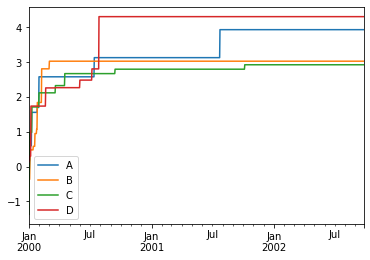

In [102]:
kdf.plot()

## Getting data in/out
See the <a href="https://koalas.readthedocs.io/en/latest/reference/io.html">Input/Output
</a> docs.

### CSV

CSV is straightforward and easy to use. See <a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.DataFrame.to_csv.html#databricks.koalas.DataFrame.to_csv">here</a> to write a CSV file and <a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.read_csv.html#databricks.koalas.read_csv">here</a> to read a CSV file.

In [51]:
kdf.to_csv('foo.csv')
ks.read_csv('foo.csv').head(10)

,A,B,C,D
0,0.976091,0.910572,-0.640756,0.034655
1,0.976091,0.910572,-0.150827,0.034655
2,0.976091,0.910572,0.796879,0.034655
3,0.976091,0.910572,0.849741,0.034655
4,0.976091,0.910572,0.849741,0.370709
5,0.976091,0.910572,0.849741,0.698402
6,0.976091,0.910572,1.217456,0.698402
7,0.976091,0.910572,1.217456,0.698402
8,0.976091,0.910572,1.217456,0.698402
9,0.976091,0.910572,1.217456,0.698402


### Parquet

Parquet is an efficient and compact file format to read and write faster. See <a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.DataFrame.to_parquet.html#databricks.koalas.DataFrame.to_parquet">here</a> to write a Parquet file and <a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.read_parquet.html#databricks.koalas.read_parquet">here</a> to read a Parquet file.

In [52]:
kdf.to_parquet('bar.parquet')
ks.read_parquet('bar.parquet').head(10)

,A,B,C,D
0,0.976091,0.910572,-0.640756,0.034655
1,0.976091,0.910572,-0.150827,0.034655
2,0.976091,0.910572,0.796879,0.034655
3,0.976091,0.910572,0.849741,0.034655
4,0.976091,0.910572,0.849741,0.370709
5,0.976091,0.910572,0.849741,0.698402
6,0.976091,0.910572,1.217456,0.698402
7,0.976091,0.910572,1.217456,0.698402
8,0.976091,0.910572,1.217456,0.698402
9,0.976091,0.910572,1.217456,0.698402


### Spark IO

In addition, Koalas fully support Spark's various datasources such as ORC and an external datasource.  See <a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.DataFrame.to_spark_io.html#databricks.koalas.DataFrame.to_spark_io">here</a> to write it to the specified datasource and <a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.read_spark_io.html#databricks.koalas.read_spark_io">here</a> to read it from the datasource.

In [53]:
kdf.to_spark_io('zoo.orc', format="orc")
ks.read_spark_io('zoo.orc', format="orc").head(10)

,A,B,C,D
0,0.976091,0.910572,-0.640756,0.034655
1,0.976091,0.910572,-0.150827,0.034655
2,0.976091,0.910572,0.796879,0.034655
3,0.976091,0.910572,0.849741,0.034655
4,0.976091,0.910572,0.849741,0.370709
5,0.976091,0.910572,0.849741,0.698402
6,0.976091,0.910572,1.217456,0.698402
7,0.976091,0.910572,1.217456,0.698402
8,0.976091,0.910572,1.217456,0.698402
9,0.976091,0.910572,1.217456,0.698402
